<a href="https://colab.research.google.com/github/Hawawou/UE-803/blob/main/Clustering_justTexts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re

In [1]:
import pandas as pd
df1 = pd.read_csv('cleaned_computer_sc.csv')
df2 = pd.read_csv('cleaned_sculptors.csv')
df = pd.concat([df1, df2])
df.head()
df.tail()

,Category,Name,Content
90,Sculptors,Evelin Winifred Aston,evelin winifred aston later evelin leigh 22 ja...
91,Sculptors,Karel Aubroeck,karel aubroeck 28 august 1894 – 28 july 1986 f...
92,Sculptors,Mary Audsley,mary c audsley 19192008 british painter sculpt...
93,Sculptors,Hezekiah Augur,hezekiah augur february 21 1791 – january 10 1...
94,Sculptors,Antun Augustinčić,antun augustinčić 4 may 1900 – 10 may 1979 cro...


# Vectorise the texts


In [3]:
X = df['Content']
Y = df['Category']
X.head()

0    atta ur rehman khan urdu عطا الرحمن خان comput...
1    willibrordus martinus pancratius van der aalst...
2    scott joel aaronson born may 21 1981 american ...
3    rediet abebe amharic ረድኤት አበበ ethiopian comput...
4    harold abelson born april 26 1947 american mat...
Name: Content, dtype: object

In [4]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [5]:
!pip install nltk

In [6]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/oumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def remove_years(text):
    # Regex to remove four-digit numbers (years)
    return re.sub(r'\b\d{4}\b', '', text)

# Apply the remove_years function to all text data
X_cleaned = [remove_years(text) for text in X]
X = X_cleaned

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [27]:
# Using TFIDF vectorizer to convert convert words to Vector Space
tfidf_vectorizer = TfidfVectorizer(max_features=200,
                                       use_idf=True,
                                       stop_words='english',
                                       tokenizer=nltk.word_tokenize,
                                       ngram_range=(1, 1))

# Fit the vectorizer to text data
# tfidf_matrix = tfidf_vectorizer.fit_transform(X_cleaned)
X_train_matrix = tfidf_vectorizer.fit_transform(X_train)
X_test_matrix = tfidf_vectorizer.transform(X_test)
print(X_test_matrix.shape)
print(X_train_matrix.shape)

/home/oumar/Projects/UE-803/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(38, 200)
(151, 200)


In [11]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)

['1' '1995' '2' '2000' '2002' '2003' '2007' '2008' '2009' '2010' '2011'
 '2013' '2014' '2015' '2017' '2018' '2019' 'academy' 'acm' 'age' 'alberti'
 'amazon' 'american' 'april' 'architecture' 'art' 'artist' 'artists'
 'arts' 'asawa' 'association' 'august' 'award' 'awarded' 'awards'
 'babbage' 'based' 'began' 'best' 'bezos' 'biography' 'board' 'book'
 'books' 'boole' 'born' 'botvinnik' 'bronze' 'building' 'business'
 'california' 'called' 'career' 'carmack' 'center' 'cerf' 'championship'
 'charles' 'chess' 'church' 'city' 'college' 'company' 'computer'
 'computers' 'computing' 'conference' 'contributions' 'created' 'data'
 'david' 'death' 'degree' 'department' 'design' 'designed' 'developed'
 'development' 'died' 'digital' 'early' 'education' 'engineering'
 'exhibition' 'external' 'family' 'father' 'fellow' 'fine' 'foundation'
 'gallery' 'george' 'germany' 'group' 'high' 'history' 'ibm' 'ieee'
 'including' 'information' 'institute' 'international' 'internet' 'inuit'
 'isbn' 'j' 'january'

# K-means clustering

In [19]:
# from sklearn.cluster import KMeans

# # Kmeans++
# km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=5, verbose=0, random_state=3425)
# km.fit(tfidf_matrix)
# # cluster assignement (list showing the cluster assigned to each instance)
# predicted_labels = km.labels_
# clusters = predicted_labels.tolist()

In [32]:
from sklearn.cluster import KMeans

# Kmeans++
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=5, verbose=0, random_state=42)
km.fit(X_train_matrix)
clusters_train = km.labels_
print(len(clusters_train))

predicted = km.predict(X_test_matrix)

# cluster assignement (list showing the cluster assigned to each instance)
clusters = predicted.tolist()
print(len(clusters))

151
38


In [15]:
# print(len(predicted_labels))
X_test

151


## Inspecting Clustering Results

In [25]:
clusters_test = pd.DataFrame({"Content": X_test, "Category": y_test, "cluster": clusters})
clusters_test.head()

,Content,Category,cluster
90,evelin winifred aston later evelin leigh 22 ja...,Sculptors,1
69,rachel ara born jersey londonbased contempora...,Sculptors,1
18,sanjeev arora born january indian american th...,Computer_Scientists,0
15,cecilia rodriguez aragon american computer sci...,Computer_Scientists,0
67,david j brown may refer david j brown crickete...,Computer_Scientists,0


In [33]:
clusters_train_df = pd.DataFrame({"Content": X_train, "Category": y_train, "cluster": clusters_train})
clusters_train_df.head()

,Content,Category,cluster
35,cecilia berdichevsky berdichevski née tuwjasz ...,Computer_Scientists,0
4,louise abbéma 30 october – 29 july french pa...,Sculptors,1
10,jane ackroyd born british artist best known p...,Sculptors,1
75,tracy kay camp born september 27 american com...,Computer_Scientists,0
93,john cocke may refer john cocke computer scien...,Computer_Scientists,0


In [49]:
from sklearn import metrics
# Convert  labels to numerical values if necessary
labels = y_train.astype('category').cat.codes
#labels= df['Category']
print( labels)
print( km.labels_)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_train_matrix, km.labels_, sample_size=1000))

print()

35    0
4     1
10    1
75    0
93    0
     ..
12    1
14    0
92    0
85    1
8     1
Length: 151, dtype: int8
[0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0
 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0
 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0
 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 1]
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand-Index: 1.000
Silhouette Coefficient: 0.094



 **Supervised metrics **show that the automatic clustering is exactly the same as the ground truth.

Unsupervised metrics: Silhouette Coefficient is an assessment of how well samples have been clustered, combining both cohesion (how close each point in a cluster is to other points in the same cluster) and separation (how far away a point in one cluster is from points in another cluster).

In our case, the silhouette coefficient is positive, however small. This can also be seen in the visualization: the two clusters, though not overlapping, almost touch in two areas.

# Visualisation of the clusters

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [36]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(X_train_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array

MDS()

# n_components=2 to plot results in a two-dimensional plane
# "precomputed" because the  distance matrix dist is already computed
# `random_state` set to 1 so that the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [50]:
#set up colors per clusters using a dict
# #1b9e77 (green) #d95f02 (orange) #7570b3 (purple) #e7298a (pink)
cluster_colors = {0: '#7570b3', 1: '#1b9e77'}

#set up cluster names using a dict
#cluster_names = {0: 'techno'}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


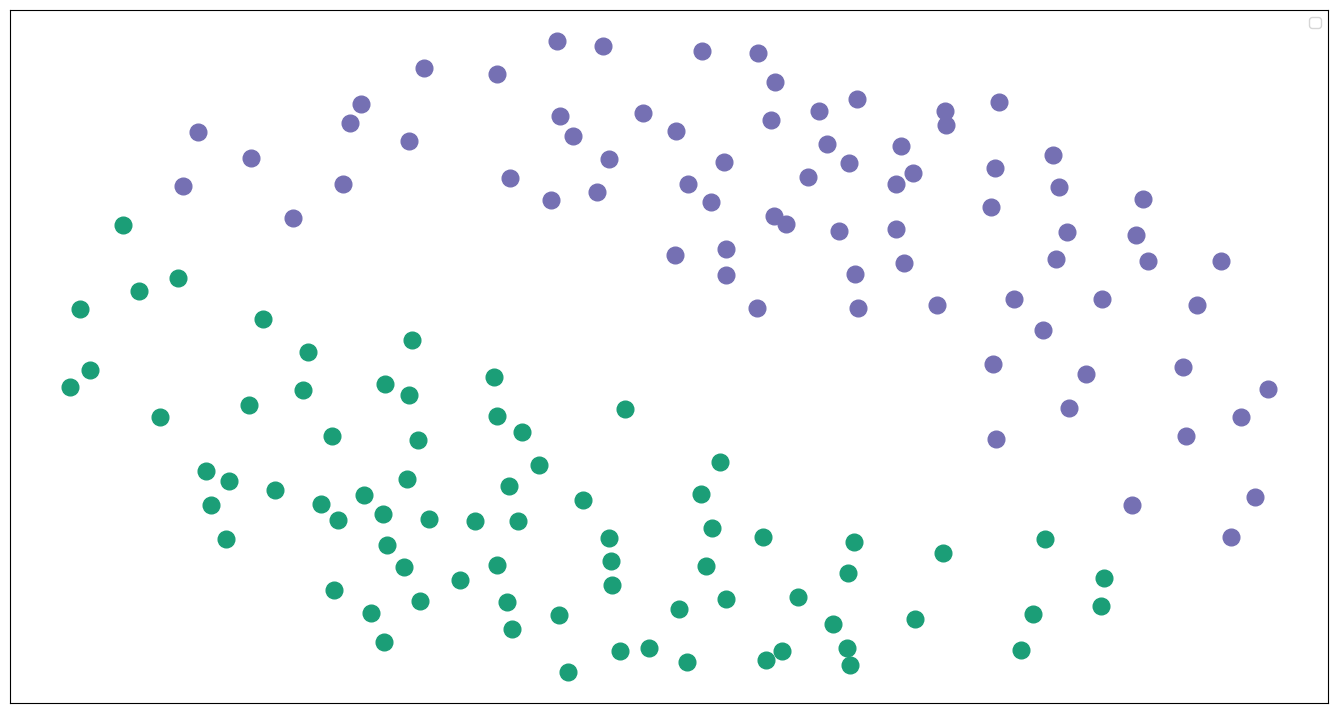

In [51]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters_train))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
        #    label=cluster_names[name],
            color=cluster_colors[name])
        #    mec='non')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelleft=False)

ax.legend(numpoints=1)  #show legend with only 1 point


plt.show() #show the plot
